In [3]:
%matplotlib inline

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
def alpha_n(u):

    return (0.1 - 0.01 * u)/(np.exp(1.0 - 0.1 * u) - 1.0)

def beta_n(u):
    
    return 0.125*np.exp(- u/80.0)

def alpha_m(u):
    
    return (2.5 - 0.1 * u)/(np.exp(2.5 - 0.1 * u) - 1.0)

def beta_m(u):
    
    return 4.0*np.exp(-u/18.0)

def alpha_h(u):
    
    return 0.07*np.exp(-u/20.0)

def beta_h(u):
    
    return 1.0/(np.exp(3.0 - 0.1*u) + 1)

In [6]:
def dndt(u, n):
    
    return alpha_n(u) * ( 1-n ) - beta_n(u) * n

def dmdt(u, m):

    return alpha_m(u)*( 1-m ) - beta_m(u) * m 
    

def dhdt(u, h):
    
    return alpha_h(u) * ( 1 - h ) - beta_h(u) * h


In [7]:
def dudt(u, m, n, h):
    
    gNa = 120.0
    gK = 36.0
    gL = 0.3 
    
    ENa = 115.0*10**(-3)
    EK = -12.0*10**(-3)
    EL = -10.6*10**(-3)
    
    return -( gNa*m**3 * h * ( u - ENa ) + gK*n**4 * ( u - EK ) + gL*( u - EL )  )

In [96]:
range = 200000
u = np.zeros(range + 1)
input = np.concatenate( (np.zeros(range/2), 100*np.ones(range/2+2)))
m = np.zeros(range + 1)
n = np.zeros(range + 1)
h = np.zeros(range + 1)

In [99]:
# External current
def I_inj(t): # step up 10 uA/cm^2 every 100ms for 400ms
    return 10*(t>100) - 10*(t>200) + 35*(t>300)
    #return 10*t

In [97]:
t_index = 0
t_step = 0.001
t_range = np.arange(range)

for t_index in t_range:

    # calculate m, n, h
    m[t_index + 1]  = m[t_index] + dmdt(u[t_index], m[t_index]) * t_step
    n[t_index + 1]  = n[t_index] + dndt(u[t_index], n[t_index]) * t_step
    h[t_index + 1]  = h[t_index] + dhdt(u[t_index], h[t_index]) * t_step
    
    u[t_index + 1] = u[t_index] + dudt(u[t_index], m[t_index + 1], n[t_index + 1], h[t_index + 1] ) * t_step + input[t_index] * t_step
    
    t_index = t_index + 1
    

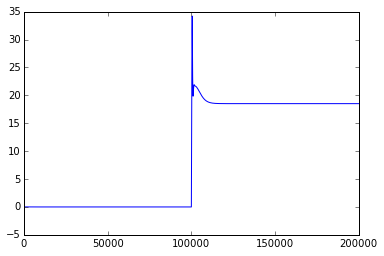

In [98]:
plt.plot(u)
plt.show()

In [92]:
np.concatenate(([1,2,3],[23,2321]))

array([   1,    2,    3,   23, 2321])